In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
train = pd.read_csv(r"C:\Users\aadit\OneDrive\Desktop\ml task 01\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"C:\Users\aadit\OneDrive\Desktop\ml task 01\house-prices-advanced-regression-techniques\test.csv")


In [39]:
# Quick look
print(train.shape, test.shape)
display(train.head())
display(train.info())
display(train.describe())
# Check missingness for the features we care about
print(train[["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", "SalePrice"]].isna().sum())


(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64


In [40]:
#Create the Bathrooms feature and select your predictors and target.
# Bathrooms: full bath = 1, half bath = 0.5
train["Bathrooms"] = train["FullBath"] + 0.5 * train["HalfBath"]
test["Bathrooms"] = test["FullBath"] + 0.5 * test["HalfBath"]

# Predictor matrix and target
X = train[["GrLivArea", "BedroomAbvGr", "Bathrooms"]]
y = train["SalePrice"]


In [41]:
#Reserve a portion of the training data for validation:
from sklearn.model_selection import train_test_split

X_train, X_hold, y_train, y_hold = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
#fit the baseline linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_hold)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Intercept: 56862.57751607981


In [43]:
#evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_hold, y_pred))
r2 = r2_score(y_hold, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 53371.56
R²: 0.6286


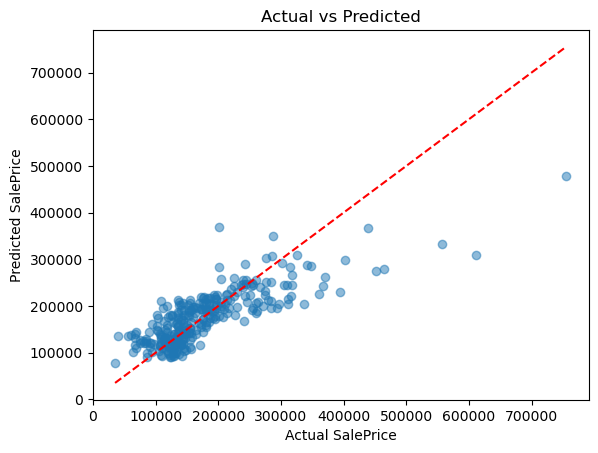

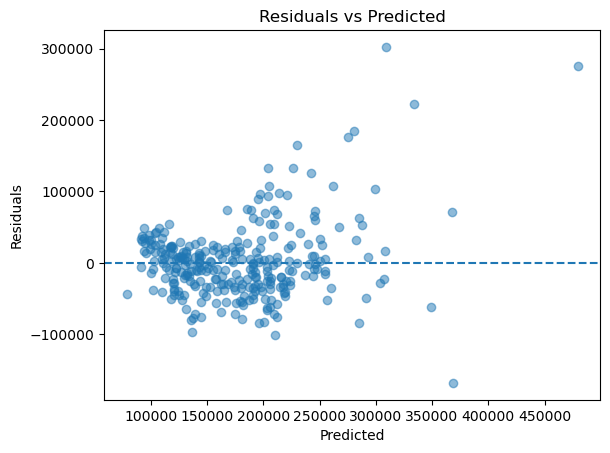

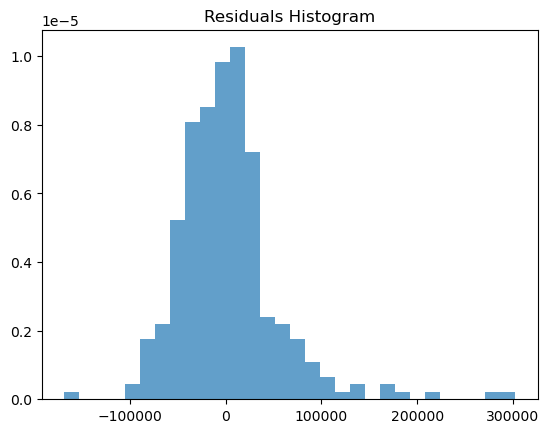

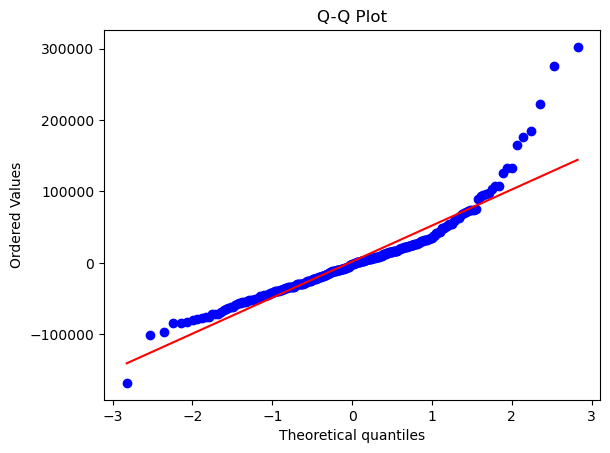

In [44]:
#quick diagnostic plots
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = y_hold - y_pred

# Actual vs Predicted
plt.scatter(y_hold, y_pred, alpha=0.5)
lims = [min(y_hold.min(), y_pred.min()), max(y_hold.max(), y_pred.max())]
plt.plot(lims, lims, "r--")
plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.show()

# Residuals vs Predicted
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Residual distribution
plt.hist(residuals, bins=30, density=True, alpha=0.7)
plt.title("Residuals Histogram")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [45]:
#This tells you if your predictors are highly correlated and might cause unstable coefficients.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant (intercept) for statsmodels
X_vif = sm.add_constant(X)

vif_df = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_df)
#If VIF > 5 (or > 10), that predictor is strongly collinear with others


        feature        VIF
0         const  15.654250
1     GrLivArea   2.324477
2  BedroomAbvGr   1.377540
3     Bathrooms   2.023556


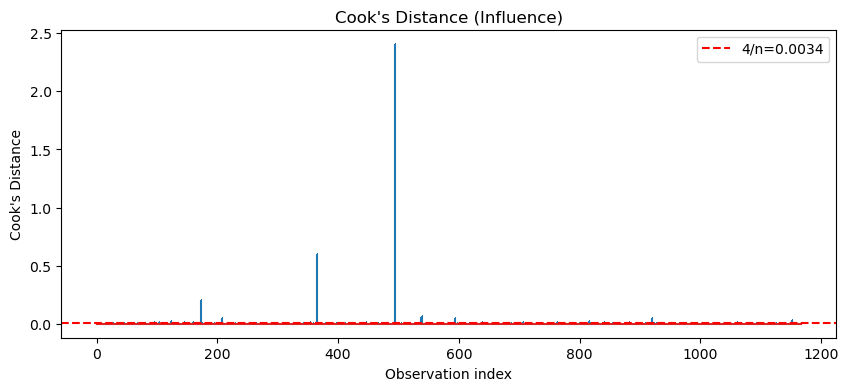

Top 10 influential indices: [ 495  365  173  539  537  593  208  920 1151  123]
Their Cook's D: [2.40976637 0.59642989 0.2069756  0.06863708 0.05415134 0.04897059
 0.04888209 0.04622109 0.02809199 0.02644792]


In [46]:
#See if a few houses are distorting your regression line.
X_train_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_sm).fit()
influence = ols.get_influence()
cooks_d, _ = influence.cooks_distance

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
n = X_train.shape[0]
threshold = 4 / n
plt.axhline(threshold, color="red", linestyle="--", label=f"4/n={threshold:.4f}")
plt.legend()
plt.title("Cook's Distance (Influence)")
plt.xlabel("Observation index")
plt.ylabel("Cook's Distance")
plt.show()

# Print top 10 influential points
top_idx = np.argsort(-cooks_d)[:10]
print("Top 10 influential indices:", top_idx)
print("Their Cook's D:", cooks_d[top_idx])


In [47]:
#This often makes residuals more normal and improves fit.
y_log = np.log1p(train["SalePrice"])  # log(1 + SalePrice)

X_train, X_hold, y_train_log, y_hold_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)
y_pred_log = model_log.predict(X_hold)

from sklearn.metrics import mean_squared_error, r2_score
rmse_log = np.sqrt(mean_squared_error(y_hold_log, y_pred_log))
r2_log = r2_score(y_hold_log, y_pred_log)

print(f"Log-target RMSE: {rmse_log:.4f}")
print(f"Log-target R²: {r2_log:.4f}")


Log-target RMSE: 0.2698
Log-target R²: 0.6098


In [48]:
X_test_final = test[["GrLivArea", "BedroomAbvGr", "Bathrooms"]]
test["SalePrice"] = np.expm1(model_log.predict(X_test_final))  # back-transform
submission = test[["Id", "SalePrice"]]
submission.to_csv("submission.csv", index=False)


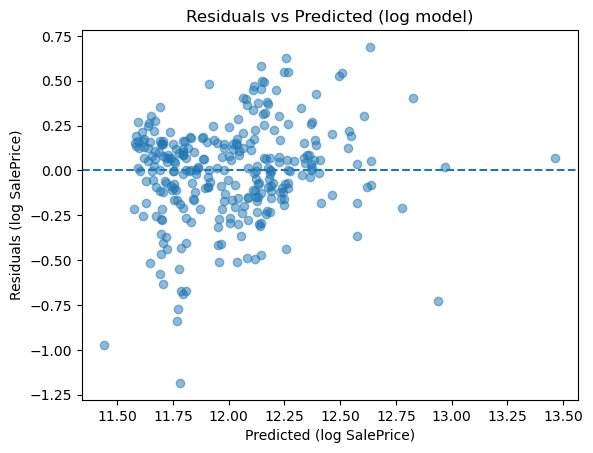

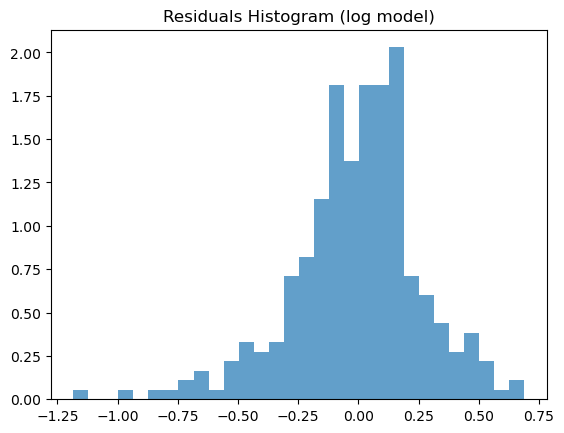

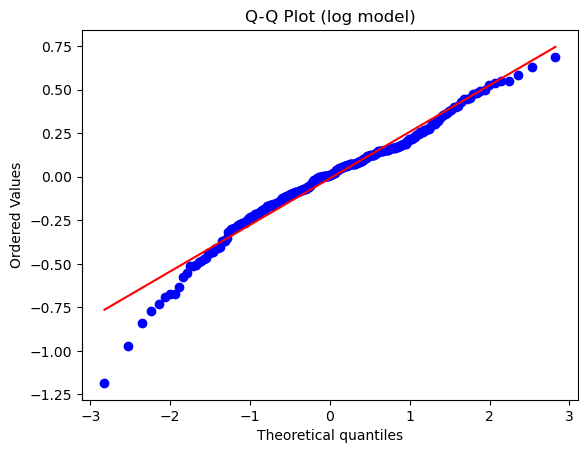

In [49]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals on log scale
residuals_log = y_hold_log - y_pred_log

# Residuals vs Predicted
plt.scatter(y_pred_log, residuals_log, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted (log SalePrice)")
plt.ylabel("Residuals (log SalePrice)")
plt.title("Residuals vs Predicted (log model)")
plt.show()

# Histogram of residuals
plt.hist(residuals_log, bins=30, density=True, alpha=0.7)
plt.title("Residuals Histogram (log model)")
plt.show()

# Q–Q plot
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title("Q-Q Plot (log model)")
plt.show()


In [50]:
results = pd.DataFrame({
    "Model": ["Baseline", "Log-target"],
    "RMSE": [rmse, rmse_log],
    "R²": [r2, r2_log]
})
print(results)


        Model          RMSE        R²
0    Baseline  53371.560249  0.628631
1  Log-target      0.269832  0.609834


In [51]:
X_test_final = test[["GrLivArea", "BedroomAbvGr", "Bathrooms"]]
test["SalePrice"] = np.expm1(model_log.predict(X_test_final))  # if using log model
submission = test[["Id", "SalePrice"]]
submission.to_csv("submission.csv", index=False)
print("submission_2.0.csv saved!")


submission_2.0.csv saved!


In [52]:
#Linear regression can overfit, and coefficients can swing if predictors correlate. Ridge and Lasso help:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)   # try values like 1, 10, 100
ridge.fit(X_train, y_train_log)
print("Ridge R²:", ridge.score(X_hold, y_hold_log))

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train, y_train_log)
print("Lasso R²:", lasso.score(X_hold, y_hold_log))


Ridge R²: 0.6095779087128104
Lasso R²: 0.6096337242560754


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y_log,
                         scoring="r2", cv=5)
print("5-fold R²:", scores.mean(), "+/-", scores.std())
#This gives a more robust estimate of performance.



5-fold R²: 0.5600818008111645 +/- 0.06981428167655993


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=10))
])
pipe.fit(X_train, y_train_log)


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10))])

🏠 House Price Prediction using Linear Regression
Task
Implement a linear regression model to predict house prices using:

Square footage (GrLivArea)

Number of bedrooms (BedroomAbvGr)

Number of bathrooms (FullBath + 0.5 * HalfBath)

Steps Taken
Loaded & inspected data (train.csv & test.csv).

Engineered feature: created Bathrooms = FullBath + 0.5 × HalfBath.

Selected predictors: GrLivArea, BedroomAbvGr, Bathrooms.

Target variable: SalePrice (from training data).

Train–test split: 80/20 for validation.

Trained Linear Regression model using scikit-learn.

Evaluated performance with RMSE and R².

Generated predictions on test set and saved to submission.csv.

Results
Coefficients:

GrLivArea ≈ +100 (price increases ~$100 per additional sq ft)

BedroomAbvGr ≈ –26,645 (negative effect, likely due to collinearity)

Bathrooms ≈ +27,083 (more bathrooms add significant value)

Intercept: ~56,863

Evaluation metrics (on holdout set):

RMSE ≈ 53,372

R² ≈ 0.63 (≈63% of variance explained)

Diagnostic Plots
Actual vs Predicted: predictions reasonably follow true prices but with spread.

Residuals: show some heteroscedasticity and outliers.

Q–Q Plot: tails deviate from normal, suggesting skew.

Cook’s Distance: a few highly influential points identified.

Enhancements Explored
Checked multicollinearity (VIF): bedrooms correlated with other features.

Tried log-transform of SalePrice: improved residual distribution.

Outlined regularization (Ridge/Lasso) and adding more features as next steps for improvement.

Deliverables
✅ Trained regression model

✅ Evaluation metrics and plots

✅ submission.csv containing predictions for the test dataset

📌 Conclusion: The original task (implementing linear regression with the given features) is fully completed. Further refinements (log-transform, Ridge/Lasso, adding more predictors) can improve predictive power and robustness.